In [1]:
import numpy as np
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

2023-05-15 09:29:56.770319: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-15 09:29:58.697776: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-15 09:29:58.698822: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-15 09:30:01.848176: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


En el archivo "datos.mat" se tiene un conjunto de datos (300 patrones) de dos clases diferentes. Cargue y visualice estos datos, después entrene una red neuronal para separar ambas clases y visualice el resultado utilizando la función 'plot_decision_regions' del script utiles.py   

In [2]:
# Carga y graficación de los datos
#-----------------------------------------------------------
nombre_archivo = '../data/datos.mat'
entrada = loadmat(nombre_archivo)

X =  entrada['X']
y = entrada['Y'].T

print(X.shape)
print(y.shape)

(300, 2)
(300, 1)


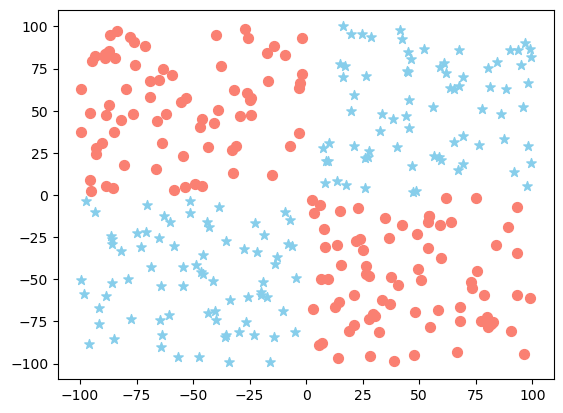

In [3]:
plt.scatter(X[ y[:,0]==0 , 0], X[ y[:,0]==0 , 1], c = 'skyblue', label='clase 0', marker='*', s=50)
plt.scatter(X[y[:,0]==1 , 0], X[y[:,0]==1 , 1], c= 'salmon', label='clase 1', marker='o', s=50)

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)
y = y.flatten()

In [5]:
keras.utils.set_random_seed(0)

model = keras.models.Sequential(
    [
        keras.layers.Flatten(input_shape=[2]),
        keras.layers.Dense(4, activation='sigmoid', name='capa_oculta'),
        keras.layers.Dense(3, activation='sigmoid', name='capa_oculta2'),
        keras.layers.Dense(1, activation='sigmoid', name='capa_salida')
    ]
)

2023-05-15 09:30:06.185773: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-05-15 09:30:06.186274: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 capa_oculta (Dense)         (None, 4)                 12        
                                                                 
 capa_oculta2 (Dense)        (None, 3)                 15        
                                                                 
 capa_salida (Dense)         (None, 1)                 4         
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [7]:
opt = keras.optimizers.Adam(learning_rate=0.1) #Fijamos cual va a ser la funcion de optimizacion
loss = keras.losses.BinaryCrossentropy() #Cual es el error que quiero minimizar, BinnaryCrossentropy porque es un problema binario
model.compile(loss=loss, optimizer=opt, metrics=['accuracy'])

In [8]:
history = model.fit(X, y, epochs=100, validation_data=(X, y) )

Epoch 1/100
10/10 [==============================] - 1s 17ms/step - loss: 0.6999 - accuracy: 0.4667 - val_loss: 0.6903 - val_accuracy: 0.5267
Epoch 2/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6950 - accuracy: 0.5233 - val_loss: 0.6843 - val_accuracy: 0.5200
Epoch 3/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.5300 - val_loss: 0.6725 - val_accuracy: 0.6567
Epoch 4/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6663 - accuracy: 0.6433 - val_loss: 0.6459 - val_accuracy: 0.6600
Epoch 5/100
10/10 [==============================] - 0s 3ms/step - loss: 0.6230 - accuracy: 0.7633 - val_loss: 0.5767 - val_accuracy: 0.8667
Epoch 6/100
10/10 [==============================] - 0s 3ms/step - loss: 0.5196 - accuracy: 0.8900 - val_loss: 0.4089 - val_accuracy: 0.9433
Epoch 7/100
10/10 [==============================] - 0s 3ms/step - loss: 0.3374 - accuracy: 0.9400 - val_loss: 0.2379 - val_accuracy: 0.9667
Epoch 8/100


372/372 [==============================] - 0s 447us/step


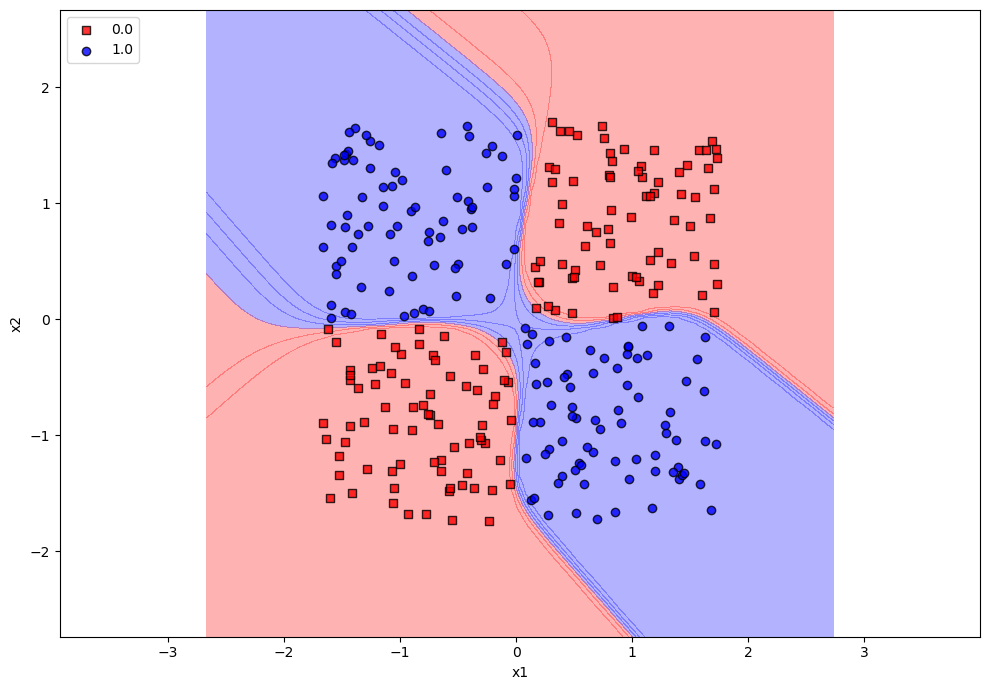

In [9]:
#Graficación utilizando plot_decision_regions
from utiles import plot_decision_regions

plt.figure(figsize=(10,7))
plot_decision_regions( X=X, y=y.T, clasificador=model)
plt.axis("equal")
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()




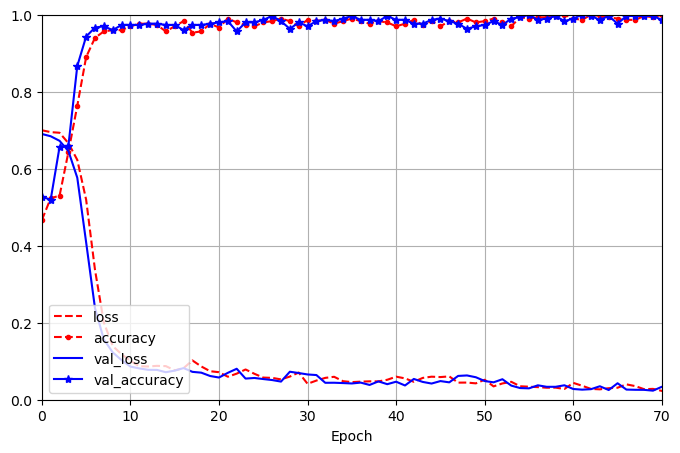

In [10]:
#Gráfica de las curvas durante el entrenamiento
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 70], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()